In [1]:
import pandas as pd
import os
current_directory = os.getcwd()
print(current_directory)

C:\Users\natal\Desktop\My_ML\data_school


In [3]:
data = pd.read_csv('C:/Users/natal/Desktop/My_ML/data/Advertising.csv', index_col=0)

In [4]:
data.head()

,TV,radio,newspaper,sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


In [5]:
data.tail()

,TV,radio,newspaper,sales
196,38.2,3.7,13.8,7.6
197,94.2,4.9,8.1,9.7
198,177.0,9.3,6.4,12.8
199,283.6,42.0,66.2,25.5
200,232.1,8.6,8.7,13.4


In [6]:
from sklearn.model_selection import train_test_split

In [7]:
data.shape

(200, 4)

In [8]:
import seaborn as sns
%matplotlib inline

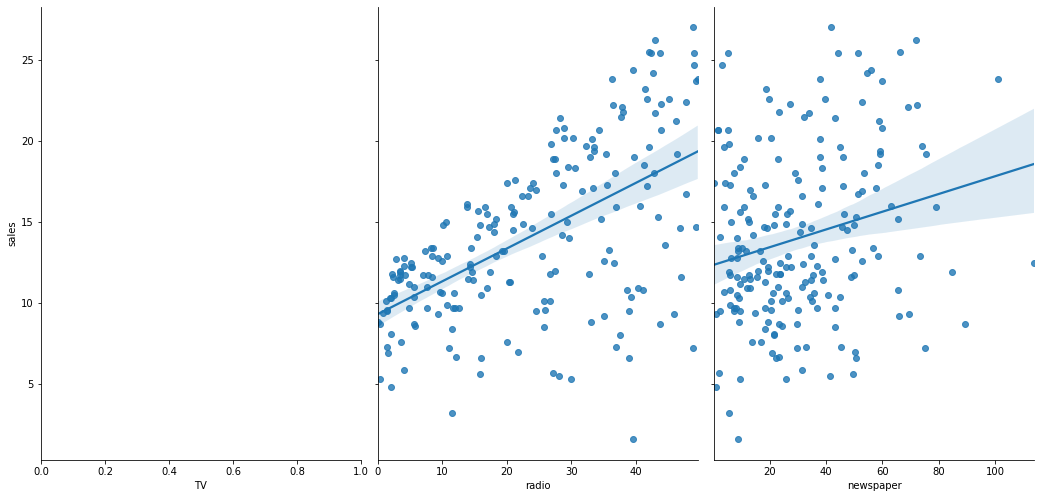

In [9]:
sns.pairplot(data, x_vars=['TV','radio','newspaper'], y_vars='sales', height=7, aspect=0.7, kind='reg')

In [10]:
feature_cols=['TV','radio','newspaper']

X=data[feature_cols]

X.head()

,TV,radio,newspaper
1,230.1,37.8,69.2
2,44.5,39.3,45.1
3,17.2,45.9,69.3
4,151.5,41.3,58.5
5,180.8,10.8,58.4


In [11]:
print(type(X))
print(X.shape)

<class 'pandas.core.frame.DataFrame'>
(200, 3)


In [12]:
y = data['sales']
y.head()

1    22.1
2    10.4
3     9.3
4    18.5
5    12.9
Name: sales, dtype: float64

In [13]:
print(type(y))
print(y.shape)

<class 'pandas.core.series.Series'>
(200,)


In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [15]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(150, 3)
(50, 3)
(150,)
(50,)


In [16]:
from sklearn.linear_model import LinearRegression

linreg = LinearRegression()
linreg.fit(X_train, y_train)

LinearRegression()

In [17]:
print(linreg.intercept_)
print(linreg.coef_)

2.8769666223179353
[0.04656457 0.17915812 0.00345046]


In [18]:
list(zip(feature_cols, linreg.coef_))

[('TV', 0.04656456787415026),
 ('radio', 0.1791581224508884),
 ('newspaper', 0.0034504647111804065)]

In [19]:
y_pred = linreg.predict(X_test)

In [20]:
true = [100, 50, 30, 20]
pred = [90, 50, 50, 30]

In [25]:
#Mean absolute Error
print ((10 + 0 + 20 + 10)/4.)

from sklearn import metrics
print(metrics.mean_absolute_error(true, pred))

10.0
10.0


In [28]:
#Mean Squared Error

print((10**2+0**2+20**2+10**2)/4.)
print(metrics.mean_squared_error(true, pred))

150.0
150.0


In [29]:
#Root Mean Squared Error (RMSE)
#same units as our response variable, y
import numpy as np

print(np.sqrt((10**2+0**2+20**2+10**2)/4.))
print(np.sqrt(metrics.mean_squared_error(true, pred)))

12.24744871391589
12.24744871391589


In [30]:
print(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

1.4046514230328948


In [34]:
#My addition: different combinations to see which is a better fit

def check_rsme(feature_cols):
    X = data[feature_cols]
    y = data.sales
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 1)
    linreg.fit(X_train, y_train)
    y_pred = linreg.predict(X_test)
    
    #RSME
    print(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

In [37]:
#My addition: different combinations to see which is a better fit

check_rsme(['TV','radio'])
check_rsme(['TV','newspaper'])
check_rsme(['radio','newspaper'])
check_rsme(['TV','radio','newspaper'])

#We can see clearly that 'newspaper' is a trouble maker...

1.3879034699382882
3.352056334433862
3.748697497467727
1.4046514230328948
